## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count=combined_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseid_duplicate=combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])].index[0]
mouse_id=combined_df.iloc[mouseid_duplicate,0]
mouse_id

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates=combined_df.loc[combined_df["Mouse ID"]==mouse_id]
# duplicates=combined_df[combined_df.duplicated(["Mouse ID"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# cleaned_df=combined_df.drop_duplicates(["Mouse ID"], keep="last").reset_index().drop(columns={"index"})
cleaned_df=combined_df.loc[combined_df["Mouse ID"]!=mouse_id]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
final_mice_count=cleaned_df["Mouse ID"].nunique()
final_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grp=cleaned_df.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
average=round(grp["Tumor Volume (mm3)"].mean(),2)
median=round(grp["Tumor Volume (mm3)"].median(),2)
variance=round(grp["Tumor Volume (mm3)"].var(),2)
std_var=round(grp["Tumor Volume (mm3)"].std(),2)
sem=round(grp["Tumor Volume (mm3)"].sem(),2)
# Assemble the resulting series into a single summary dataframe.
summary_df=pd.DataFrame({"Tumor Volume Average":average,"Tumor Volume Median": median,"Tumor Volume Variance":variance,
                         "Tumor Volume Standard Variation":std_var,"Tumor Volume SEM":sem})
summary_df

,Tumor Volume Average,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Variation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary2_df= round(cleaned_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}),2)
summary2_df

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Timepoints per Drug Regimen')

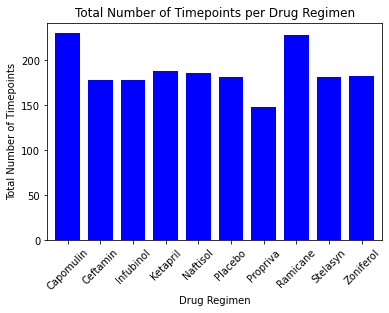

In [57]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grp["Timepoint"].count().plot(kind="bar",rot=45,color="blue",width=0.75)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.title("Total Number of Timepoints per Drug Regimen")

([<matplotlib.axis.XTick at 0x2747948a970>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

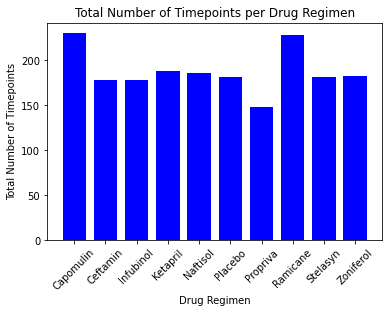

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_df=pd.DataFrame({"Total Number of Timepoints for All Mice":grp["Timepoint"].count()})
drugs=bar_df.index.values
x_axis=list(range(len(bar_df["Total Number of Timepoints for All Mice"])))
plt.bar(x_axis, bar_df["Total Number of Timepoints for All Mice"],color="blue",align="center",width=0.75)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.title("Total Number of Timepoints per Drug Regimen")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation=45)

(-1.1783965841953412,
 1.1045905840841415,
 -1.1061138787401394,
 1.1770250192947356)

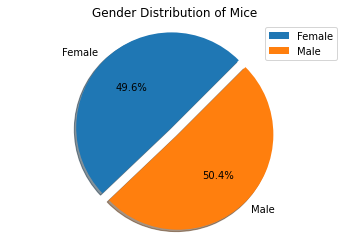

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_df.groupby("Sex")["Mouse ID"].nunique().plot(kind="pie", startangle=45,shadow=True,explode=[0.1,0.0],autopct="%1.1f%%")
plt.title("Gender Distribution of Mice")
plt.legend()
plt.ylabel("")
plt.axis("equal")

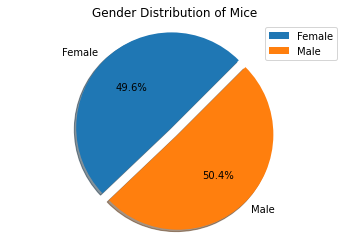

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_df=pd.DataFrame({"Total Number of Mice":cleaned_df.groupby("Sex")["Mouse ID"].nunique()})
labels=pie_df.index.values
distribution=pie_df["Total Number of Mice"]
plt.pie(distribution, labels=labels, startangle=45,shadow=True,explode=[0.1,0.0],autopct="%1.1f%%")
plt.title("Gender Distribution of Mice")
plt.axis("equal")
plt.legend()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
